# EDA ON NETFLIX USERBASE

***Introduction***


The dataset provides a snapshot of a sample Netflix userbase, showcasing various aspects of user subscriptions, revenue, account details, and activity.


**Objective**

 To identify key patterns and behaviors associated with the Netflix users. I used techniques such as demographic analysis, device usage analysis, and subscription habit analysis to uncover complex relationships and significant determinants within the database.

**Importing required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Loading the CSV file**

In [2]:
netflix=pd.read_csv(r"C:\Users\LENOVO\Downloads\Netflix Userbase.csv")
netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


**Getting all the information of dataframe**

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


**Checking the null values**

In [4]:
netflix.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

**Removing duplicates**

In [5]:
netflix.drop_duplicates(inplace=True)
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


**Finding the statistical functions such as mean,count etc.**

In [6]:
netflix.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


**Countrywise Total users and Monthly revenue**

In [7]:
country_data=netflix.groupby('Country').agg({'User ID':'count','Monthly Revenue':'sum'}).reset_index()
country_data

,Country,User ID,Monthly Revenue
0,Australia,183,2271
1,Brazil,183,2285
2,Canada,317,3950
3,France,183,2307
4,Germany,183,2260
5,Italy,183,2317
6,Mexico,183,2237
7,Spain,451,5662
8,United Kingdom,183,2318
9,United States,451,5664


**Countrywise monthly revenue**

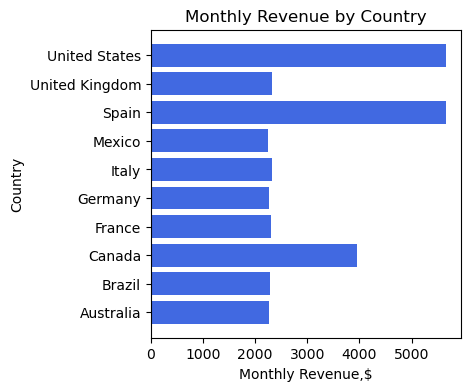

In [8]:
# Plotting Horizontal bar chart
plt.figure(figsize=(4,4))
plt.barh(country_data['Country'],country_data['Monthly Revenue'],color='royalblue')
plt.xlabel("Monthly Revenue,$")
plt.ylabel("Country")
plt.title("Monthly Revenue by Country")
plt.show()

Netflix generating highest revenue from United States,followed by Spain and Canada

**Countrywise total users**

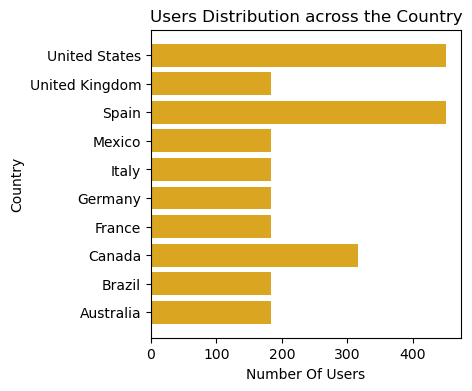

In [9]:
# Plotting Horizontal bar chart
plt.figure(figsize=(4,4))
plt.barh(country_data['Country'],country_data['User ID'],color='goldenrod')
plt.xlabel('Number Of Users')
plt.ylabel('Country')
plt.title("Users Distribution across the Country")
plt.show()

Netflix's users are spread across several countries. The countries with the most users are the United States ,Spain, Canada among others. Netflix's wide geographic reach is a testament to its global appeal. 

**Age distribution**

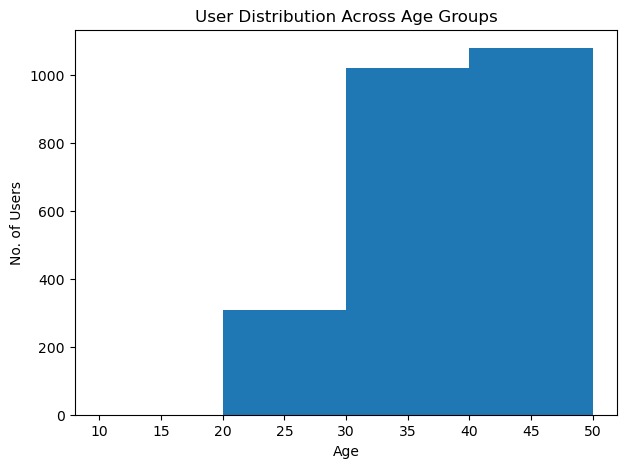

In [10]:
# plotting Histogram chart
plt.figure(figsize=(7,5))
Age_group=[10,20,30,40,50]
plt.hist(netflix['Age'],Age_group)
plt.title('User Distribution Across Age Groups')
plt.xlabel('Age')
plt.ylabel("No. of Users")
plt.show()

The age distribution of Netflix users is relatively broad, with significant representation across different age groups. The most common age group of Netflix users is around 40-50 years 🧑‍🦱🧓, but there's also a considerable number of users in the 30-40 🧑‍🦰 and 20-30 🧓 age brackets. This tells us that Netflix's content appeals to a wide age range, which is a positive sign for the company's ability to maintain a diverse user base

**Users Distrbution by device type**

In [11]:
dev=netflix.groupby('Device')['User ID'].count()
dev

Device
Laptop        636
Smart TV      610
Smartphone    621
Tablet        633
Name: User ID, dtype: int64

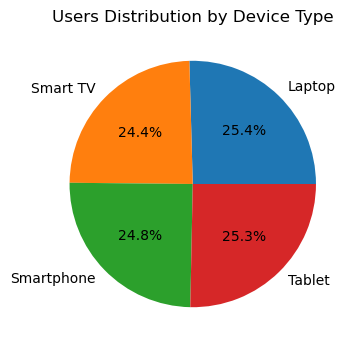

In [12]:
# Plotting the Pie
Users = [636, 610, 621, 633]
devices = ['Laptop', 'Smart TV', 'Smartphone', 'Tablet']

plt.figure(figsize=(4,4))
plt.pie(Users, labels=devices,autopct='%1.1f%%')

# Adding a title
plt.title("Users Distribution by Device Type")



# Display the piechart
plt.show()

The most popular device for consuming Netflix content is the laptop 💻,followed by tablet and Smartphone . This could be due to the flexibility and convenience offered by these devices

**Users Distribution by Subscription Type**

In [13]:
sub=netflix.groupby('Subscription Type')['User ID'].count()
sub

Subscription Type
Basic       999
Premium     733
Standard    768
Name: User ID, dtype: int64

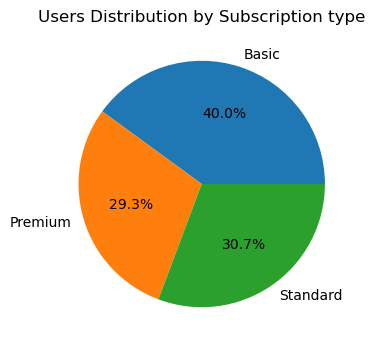

In [14]:
#Plotting the Pie chart

plt.figure(figsize=(4,4))
sub_type=['Basic','Premium','Standard']
values=[999,733,768]
plt.pie(values,labels=sub_type,autopct='%1.1f%%')
plt.title("Users Distribution by Subscription type")
plt.show()

The distribution of subscription types among Netflix users shows a preference for the basic subscription, followed by the standard and then the Premium subscription. This suggests that most users prefer basic plan due its low cost

**Gender distribution**

In [15]:
gen=netflix.groupby('Gender')['User ID'].count()
gen

Gender
Female    1257
Male      1243
Name: User ID, dtype: int64

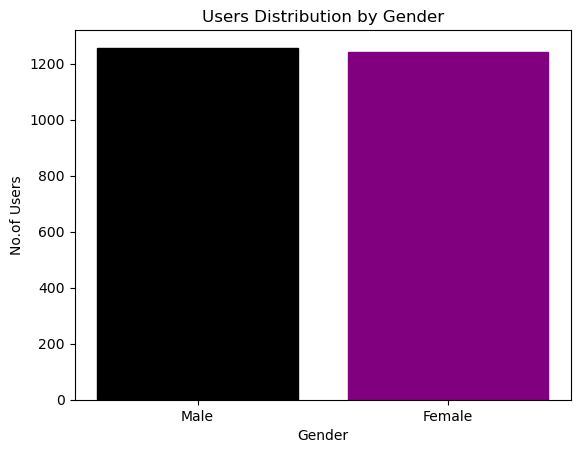

In [16]:
count=[1257,1243]
Gender=['Male','Female']
bars=plt.bar(Gender,count)
bars[0].set_color('black')
bars[1].set_color('Purple')
plt.title("Users Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("No.of Users")
plt.show()

In terms of gender distribution, Netflix seems to have a fairly even split between male and female users. This balanced distribution indicates that the platform's content appeals to both genders equally

**Calculate Churn rate**

In [17]:
from datetime import datetime

# Convert the 'Join Date' and 'Last Payment Date' columns to datetime objects
netflix['Join Date'] = pd.to_datetime(netflix['Join Date'], format='%d-%m-%y')
netflix['Last Payment Date'] = pd.to_datetime(netflix['Last Payment Date'], format='%d-%m-%y')

# Calculate the number of days between the join date and the last payment date
netflix['Days Active'] = (netflix['Last Payment Date'] - netflix['Join Date']).dt.days

# Calculate the churn rate
churn_rate = (netflix['Days Active'] < 30).mean()
churn_rate

0.0016

In my analysis, I considered a user as "churned" if they were active for less than 30 days. Based on this definition, the churn rate in our dataset is approximately 0.16%. This low churn rate indicates that most users continue to use Netflix beyond their first month of subscription, suggesting a high level of user retention and satisfaction with the service